<a href="https://colab.research.google.com/github/yanghyeon408/OpenCV/blob/master/05_%ED%99%94%EC%A7%88%EA%B0%9C%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#05화질 개선


#5.1이동 평균법
##주목 화소 8근방 화소의 평균을 출력

In [ ]:
import numpy as np

def mean_blur(img):
    A = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape
    for y in range(height):
        for x in range(width):
            try:
                S = 1*img[y-1, x-1] + img[y-1, x] + img[y-1, x+1] \
                    + img[y  , x-1] + img[y  , x] + img[y  , x+1] \
                    + img[y+1, x-1] + img[y+1, x] + img[y+1, x+1]
                S = S/9
                if S > 255:
                    A[y, x] = 255
                elif S < 0:
                    A[y, x] = 0
                else:
                    A[y, x] = int(S)
            except:
                pass
    return A 

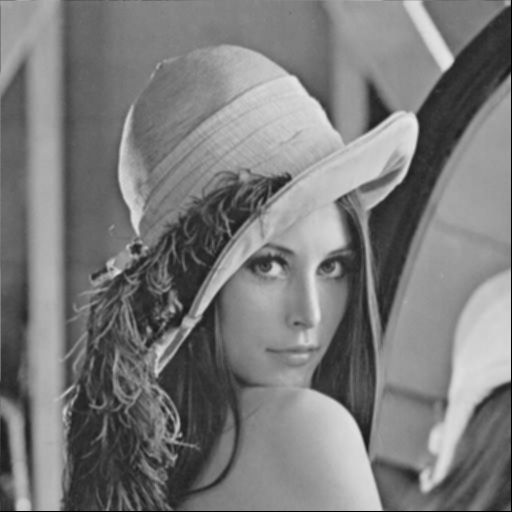

In [ ]:
import cv2
from yh import img_pro
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(mean_blur, img)

#5.2 메디안 필터

In [ ]:
def median_blur(img):
    A = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape[:2]
    for y in range(height):
        for x in range(width):
            try :
                S = [img[y-1, x-1], img[y-1, x], img[y-1, x+1],
                     img[y  , x-1], img[y  , x], img[y  , x+1],
                     img[y+1, x-1], img[y+1, x], img[y+1, x+1]]
                A[y, x] = np.median(S)
            except:
                pass
    return A

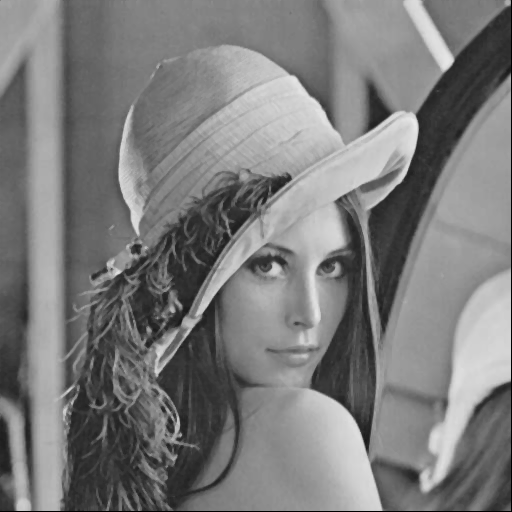

In [ ]:
import cv2
from yh import img_pro
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(median_blur, img)

scipy 의 median_filter()

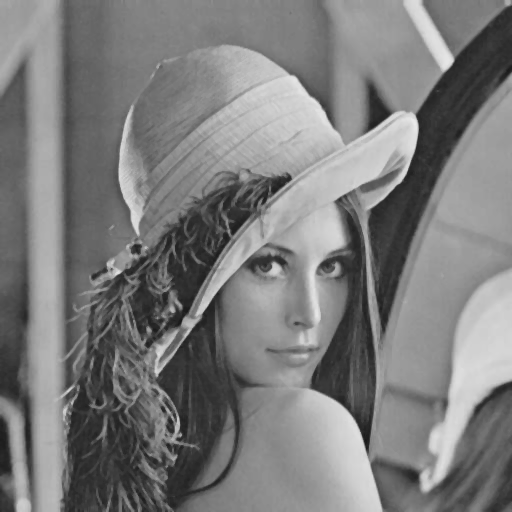

In [ ]:
from scipy import ndimage
lenagray = cv2.imread('lena_gray.png')
result = ndimage.median_filter(lenagray, size = 3)
from google.colab.patches import cv2_imshow
cv2_imshow(result)

#5.3 가우시안 필터

In [ ]:
def gaussian_blur(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape
    for y in range(height):
        for x in range(width):
            try:
                T =  1*img[y-1, x-1] + 2*img[y-1, x] + 1*img[y-1, x+1] \
                    + 2*img[y  , x-1] + 4*img[y  , x] + 2*img[y  , x+1] \
                    + 1*img[y+1, x-1] + 2*img[y+1, x] + 1*img[y+1, x+1]
                img_[y, x] = (T) / 16
            except:
                pass
    return img_

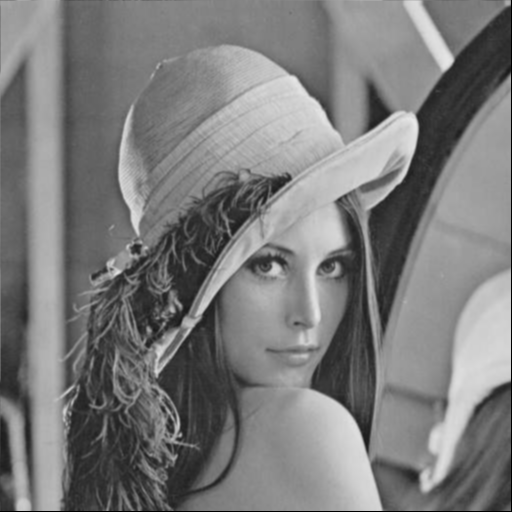

In [ ]:
import cv2
from yh import img_pro
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(gaussian_blur, img)

#5.4 모폴로지

In [ ]:
def contraction(img_in):
    height, width = img_in.shape
    img_out = np.zeros(img_in.shape, np.uint8)
    for y in range(1, height -1):
        for x in range(1, width -1):
            img_out[y, x] = img_in[y, x]
            if img_in[y-1, x-1] == 0:
                img_out[y, x] = 0
            if img_in[y-1, x] == 0:
                img_out[y, x] = 0
            if img_in[y-1, x+1] == 0:
                img_out[y, x] = 0
            if img_in[y, x-1] == 0:
                img_out[y, x] = 0
            if img_in[y, x+1] == 0:
                img_out[y, x] = 0
            if img_in[y+1, x-1] == 0:
                img_out[y, x] = 0
            if img_in[y+1, x] == 0:
                img_out[y, x] = 0
            if img_in[y+1, x+1] == 0:
                img_out[y, x] = 0
    return img_out


In [ ]:
def expansion(img_in):
    height, width = img_in.shape
    img_out = np.zeros(img_in.shape, np.uint8)
    for y in range(1, height -1):
        for x in range(1, width -1):
            img_out[y, x] = img_in[y, x]
            if img_in[y-1, x-1] == 255:
                img_out[y, x] = 255
            if img_in[y-1, x] == 255:
                img_out[y, x] = 255
            if img_in[y-1, x+1] == 255:
                img_out[y, x] = 255
            if img_in[y, x-1] == 255:
                img_out[y, x] = 255
            if img_in[y, x+1] == 255:
                img_out[y, x] = 255
            if img_in[y+1, x-1] == 255:
                img_out[y, x] = 255
            if img_in[y+1, x] == 255:
                img_out[y, x] = 255
            if img_in[y+1, x+1] == 255:
                img_out[y, x] = 255
    return img_out

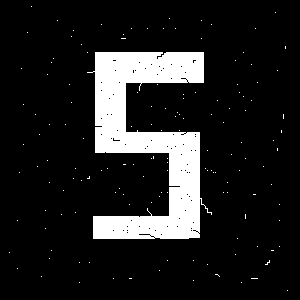

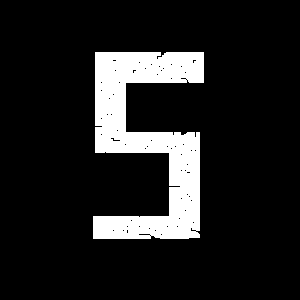

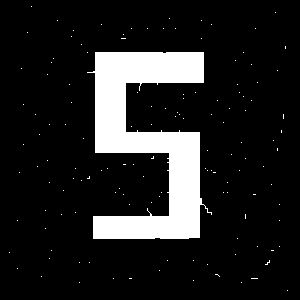

In [ ]:
img5 = cv2.imread('five.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img5)
from yh import img_pro
img5_cont = img_pro(contraction, img5, output=False)
img_pro(expansion, img5_cont)
img5_exp = img_pro(expansion, img5, output=False)
img_pro(contraction, img5_exp)

침식연산

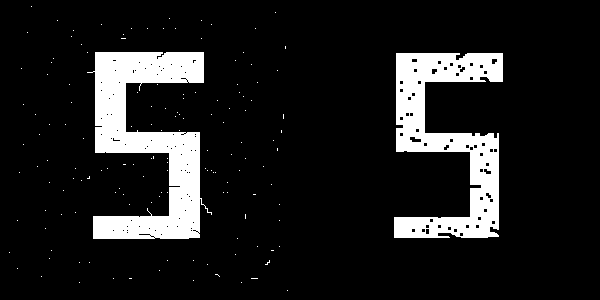

True

In [ ]:
import cv2
import numpy as np


img = cv2.imread('five.png')

#구조화 요소 커널, 사각형(3x3) 생성
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
#침식 연산적용
erosion = cv2.erode(img, k)

#결과 출력
merged = np.hstack((img, erosion))
from google.colab.patches import cv2_imshow
cv2_imshow(merged)
cv2.imwrite('five_hole.png', merged)

팽창 연산

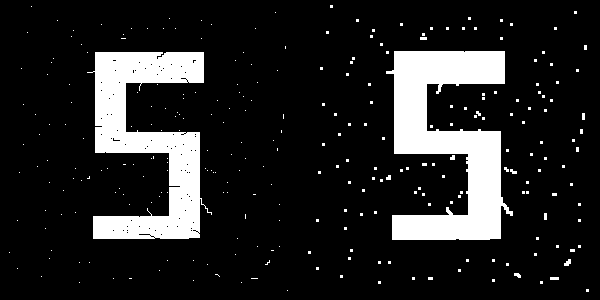

True

In [ ]:
import cv2
import numpy as np

img = cv2.imread('five.png')

k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
#팽창연산적용
dst = cv2.dilate(img, k)

merged = np.hstack((img, dst))
cv2_imshow(merged)
cv2.imwrite('five_clean.png', merged)

열림 = 침식 후 팽창  
*주변보다 밝은 노이즈 제거에 효과적  
*독립된 개체를 분리하거나 돌출된 픽셀을 제거하는데 좋음

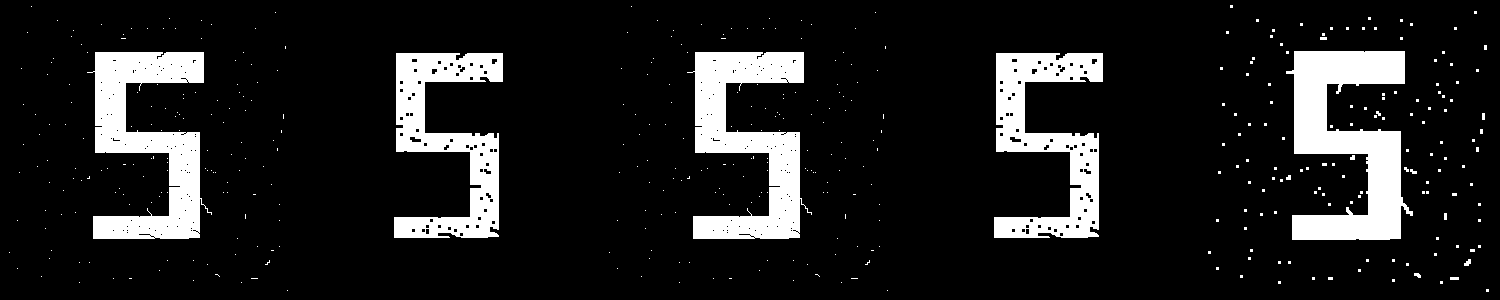

In [ ]:
import cv2
import numpy as np

img = cv2.imread('five.png')

k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
#침식 연산적용
erosion = cv2.erode(img, k)
#팽창연산적용
dst = cv2.dilate(img, k)

merged1 = np.hstack((img, erosion))
merged2 = np.hstack((merged1, dst))
merged3 = np.hstack((merged1, merged2))
cv2_imshow(merged3)

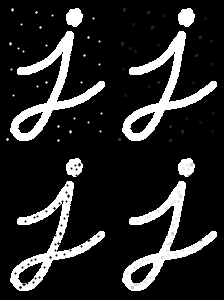

In [ ]:
import cv2
import numpy as np

img1 = cv2.imread('morph_dot.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('morph_hole.png', cv2.IMREAD_GRAYSCALE)

k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN, k)
closing = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, k)

merged1 = np.hstack((img1, opening))
merged2 = np.hstack((img2, closing))
merged3 = np.vstack((merged1, merged2))
cv2_imshow(merged3)

모폴로지 그레이디언트

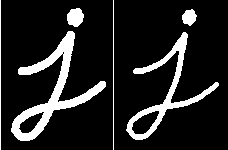

In [ ]:
import cv2
import numpy as np


img = cv2.imread('morphological.png')

k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

gradient = cv2.morphologyEx(img, cv2.MORPH_RECT, k)

merged = np.hstack((img, gradient))
cv2_imshow(merged)

히스토그램과 밝기값 조절

<BarContainer object of 256 artists>

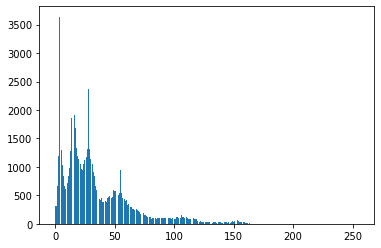

In [ ]:
img = cv2.imread("couple2.jpg", flags=cv2.IMREAD_GRAYSCALE)
import numpy as np
import matplotlib.pyplot as plt


hist = np.zeros(256)
height, width = img.shape
for y in range(height):
    for x in range(width):
        hist[img[y, x]] = hist[img[y, x]] + 1
plt.bar(x=range(256), height=hist)

In [ ]:
def histogram(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            hist[img[y, x]] = hist[img[y, x]] + 1
    return hist

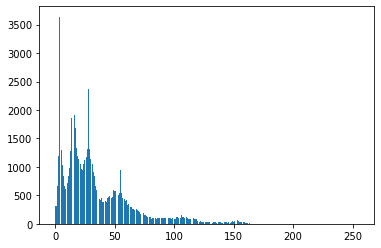

In [ ]:
plt.bar(x=list(range(256)), height=histogram(img))
plt.show()

In [ ]:
def brightness(img, threshold = 0):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)

    for y in 

#5.5콘트라스트 강조

In [ ]:
import numpy as np


def contrast(img, low = 0, high = 255):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype = np.uint8)

    for y in range(height):
        for x in range(width):
            temp = (int)((255/(high-low)) * (img[y][x] -low));
            if (temp > 255):
                img_[y][x] = 255
            elif (temp < 0):
                img_[y][x] = 0
            else:
                img_[y][x] = temp
    return img_

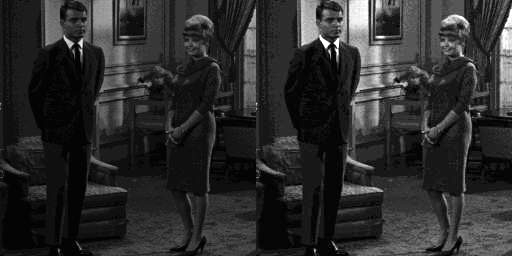

In [ ]:
img = cv2.imread('couple2.jpg', cv2.IMREAD_GRAYSCALE)

img2 = img_pro(contrast, img, 0, 160, output=False)
cv2_imshow(np.c_[img,img2])

160을 100으로 바꾸면 더 밝은 그림이 나온다

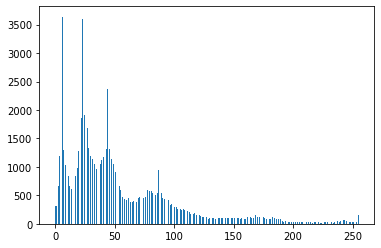

In [ ]:
plt.bar(x=list(range(256)), height=histogram(img2))
plt.show()

#5.6 평활화

cv2.equalizeHist(src[,dst]) -> dst 이용

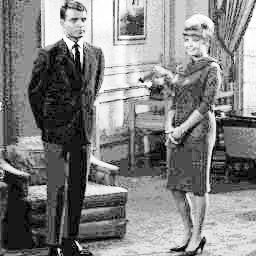

In [ ]:
import cv2
img = cv2.imread('couple2.jpg', cv2.IMREAD_GRAYSCALE)
img_ =cv2.equalizeHist(img)
cv2_imshow(img_)

넘파이 이용한 평활화

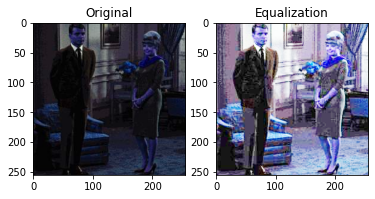

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('couple2.jpg')

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()

cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

img2 = cdf[img]
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(img2), plt.title('Equalization')
plt.show()

히스토그램 평활화

In [ ]:
def equalization(img):
    height, width = img.shape
    img_in = img.copy()
    img_out = np.zeros(img_in.shape, dtype=np.uint8)
    histogram = np.zeros(256, dtype= int)
    sum_histo = np.zeros(256, dtype=int)

    for y in range(height):
        for x in range(width):
            histogram[img_in[y, x]] = histogram[img_in[y, x]] + 1

    sum = 0
    scale_factor = 255 / (width* height)  #정규화된 합을 계산하기 위함
    for i in range(256):
        sum = sum + histogram[i]
        sum_histo[i] = np.ceil(sum*scale_factor)

    for y in range(height):
        for x in range(width):
            img_out[y, x] = sum_histo[img_in[y][x]]

    return img_out

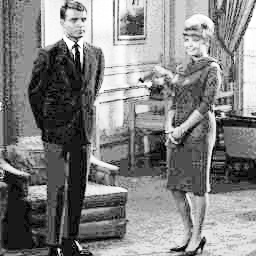

In [ ]:
import cv2
from yh import img_pro

img = cv2.imread('couple2.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(equalization, img)

히스토그램 평활화 전/후 

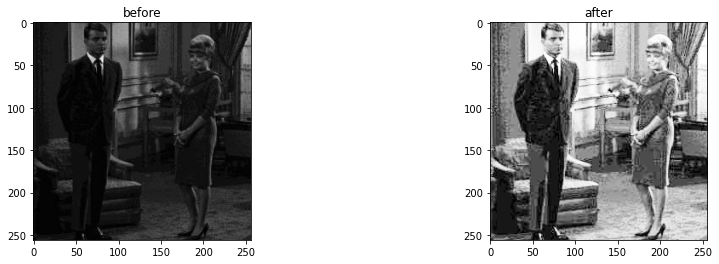

In [ ]:
img = cv2.imread('couple2.jpg', cv2.IMREAD_GRAYSCALE)
hist1 = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
img2 = cv2.equalizeHist(img)
hist2 = cv2.calcHist(images=[img2], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

plt.figure(figsize=(15, 4))
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('before')
plt.subplot(122); plt.imshow(img2, cmap='gray'); plt.title('after')
plt.show()

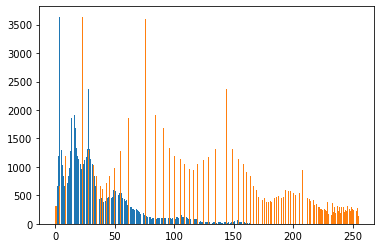

In [ ]:
plt.bar(x=list(range(256)), height=histogram(img))
plt.bar(x=list(range(256)), height=histogram(img2))
plt.show()

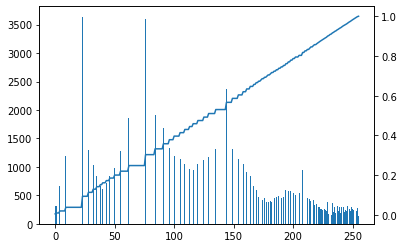

In [ ]:
cumsum_hist = np.cumsum(hist2.flatten())
sum_hist = np.sum(hist2)
plt.bar(range(256), hist2.flatten())
ax = plt.twinx()
ax.plot(range(256), cumsum_hist/sum_hist)
plt.show()

#3.6 CLAHE  
Contrast Limited Adaptive Histogram Equalization

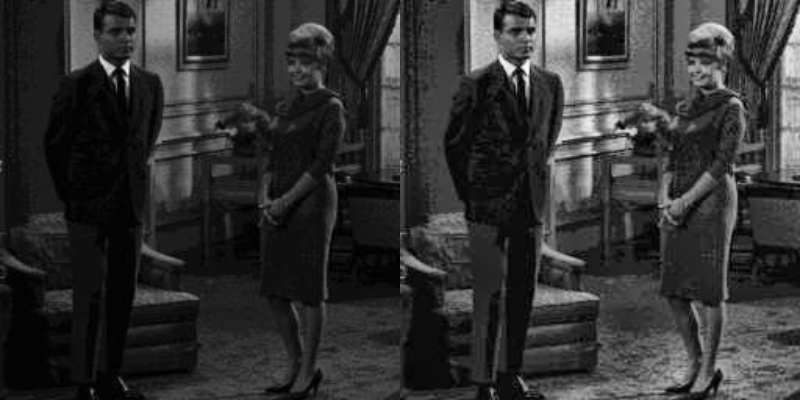

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('couple2.jpg', 0)

#contrast limit 2이고 title 의 size는 8x8
clahe = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8, 8))
img2 = clahe.apply(img)

img = cv2.resize(img,(400, 400))
img2 = cv2.resize(img2, (400, 400))

dst = np.hstack((img, img2))
cv2_imshow(dst)

#3.7 히스토그램 평탄화  
원화상의 화소수가 적은 부분은 압축되고, 화소수가 많은 부분은 신장됩니다.  
속도가 매우 느림
실상을 잘 안쓰임


In [ ]:
def flatening(img):
    height, width = img.shape
    img_in = img.copy()
    img_out = np.zeros(img.shape, dtype=np.uint8)
    histogram = np.zeros(256, dtype=int) # 화소들 수를 저장해야 함

    for y in range(height):
        for x in range(width):
            histogram[img_in[y, x]] = histogram[img_in[y,x]] + 1
    low = 255 # 현재 평균화소로 옮겨지는 단계
    high = 255
    delta = 0 #주위 화소 레벨에 따라 선택되는 화소 수
    avg_pixel_count = (int)((height*width)/256) #평탄화 후의 1농도 레벨의 화소 수

    for i in range(255, -1, -1):
        sum = 0
        while(sum < avg_pixel_count):
            sum = sum + histogram[low]
            low = low - 1

        low = low + 1
        delta = histogram[low] - (sum - avg_pixel_count); #평균화 하고 남은 화소값 유지하기 위해
        buffer = sort_by_weight(img_in, low, histogram[low])

        if (low < high):
            for y in range(height):
                for x in range(width):
                    if (img_in[y, x] >= low+1) & (img_in[y, x] <= high):
                        img_out[y, x] = i
                
        for j in range(delta):
            img_out[int(buffer[j].y), int(buffer[j].x)] = i
            img_in[int(buffer[j].y), int(buffer[j].x)] = low + 1

        histogram[low] = histogram[low] - delta
        high = low

    return img_out

In [ ]:
class SortedPixel():
    def __init__(self, x, y, weight):
        self.x = x
        self.y = y
        self.weight = weight

def sort_by_weight(pixels, level, count):
    height, width = pixels.shape
    data = [ ]
    inum = 0
    weight = 0

    for y in range(height):
        for x in range(width):
            try:
                if (pixels[y,x]==level):
                    w = get_weight(pixels, x, y)
                    data.append(SortedPixel(x, y, w))
                    inum = inum + 1
            except:
                pass
    from operator import attrgetter
    data.sort(key=attrgetter('weight')) # weight 를 이용해 리스트의 인스턴스를 정렬

    return data

In [ ]:
import numpy as np


def get_weight(pixels, x, y):
    weight = 0
    xm = x - 1
    ym = y - 1
    xp = x + 1
    yp = y + 1
    d = np.zeros(8, dtype=int)
    height, width = pixels.shape

    if (xm < 0):
        xm = x
    if (ym < 0):
        ym = y
    if (xp >= width):
        xp = x
    if (yp >= height):
        yp = y

    d[0] = pixels[ym, xm];    d[1] = pixels[ym, x];      d[2] = pixels[ym, xp];
    d[3] = pixels[y, xm];                               d[4] = pixels[y, xp];
    d[5] = pixels[yp, xm];    d[6] = pixels[yp, x];      d[7] = pixels[yp, xp];

    weight = np.sum(d)

    return weight;

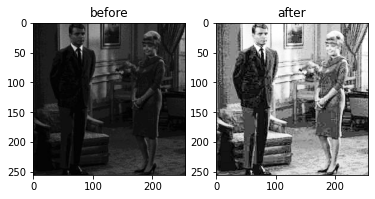

In [ ]:
img = cv2.imread('couple2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = flatening(img)

import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('before')
plt.subplot(122); plt.imshow(img2, cmap='gray'); plt.title('after')
plt.show()

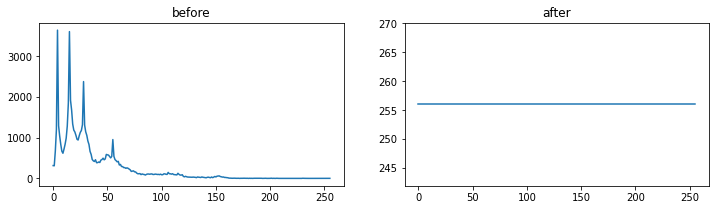

In [ ]:
hist1 = cv2.calcHist(images=[img], channels=[0], mask = None, histSize=[256], ranges=[0, 256])
hist2 = cv2.calcHist(images=[img2], channels=[0], mask = None, histSize=[256], ranges=[0, 256])

plt.figure(figsize=(12, 3))
plt.subplot(121); plt.plot(range(256), hist1.flatten()); plt.title('before')
plt.subplot(122); plt.plot(range(256), hist2.flatten()); plt.title('after')
plt.show()

In [ ]:
hist2.flatten()

array([256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 25